In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
# Generate sample data (replace with your actual data)
def generate_sample_data(n_customers=1000):
    np.random.seed(42)
    
    data = {
        'customer_id': range(n_customers),
        'tenure': np.random.randint(1, 72, n_customers),  # months
        'monthly_charges': np.random.uniform(20, 100, n_customers),
        'total_charges': np.random.uniform(50, 5000, n_customers),
        'contract_type': np.random.choice(['Month-to-month', 'One year', 'Two year'], n_customers),
        'paperless_billing': np.random.choice([0, 1], n_customers),
        'payment_method': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], n_customers),
        'monthly_usage_gb': np.random.uniform(50, 500, n_customers),
        'support_calls': np.random.randint(0, 10, n_customers),
        'account_age_days': np.random.randint(30, 365*3, n_customers)
    }
    
    df = pd.DataFrame(data)

    # Create realistic churn labels (more tenure, lower charges = less churn)
    churn_prob = (
        0.1 +
        0.3 * (df['tenure'] < 12) +
        0.2 * (df['monthly_charges'] > 70) +
        0.15 * (df['support_calls'] > 5) +
        0.1 * (df['contract_type'] == 'Month-to-month') -
        0.1 * (df['tenure'] > 24)
    )
    
    df['churn'] = (np.random.random(n_customers) < churn_prob).astype(int)
    return df

In [7]:
# Generate and explore data

df = generate_sample_data(1000)
print(df.head())
print(f"\nChurn Rate: {df['churn'].mean():.2%}")

   customer_id  tenure  monthly_charges  total_charges   contract_type  \
0            0      52        88.455717    2037.396864        One year   
1            1      15        86.417589    4010.351295  Month-to-month   
2            2      61        51.774682    1059.976391        One year   
3            3      21        73.446811    2797.670499        Two year   
4            4      24        36.398744    3678.702915        One year   

   paperless_billing    payment_method  monthly_usage_gb  support_calls  \
0                  1     Bank transfer        448.777082              1   
1                  1  Electronic check        256.333353              4   
2                  1       Credit card        304.065788              9   
3                  1     Bank transfer        348.362242              2   
4                  0      Mailed check        355.579972              8   

   account_age_days  churn  
0               247      0  
1              1028      0  
2               8

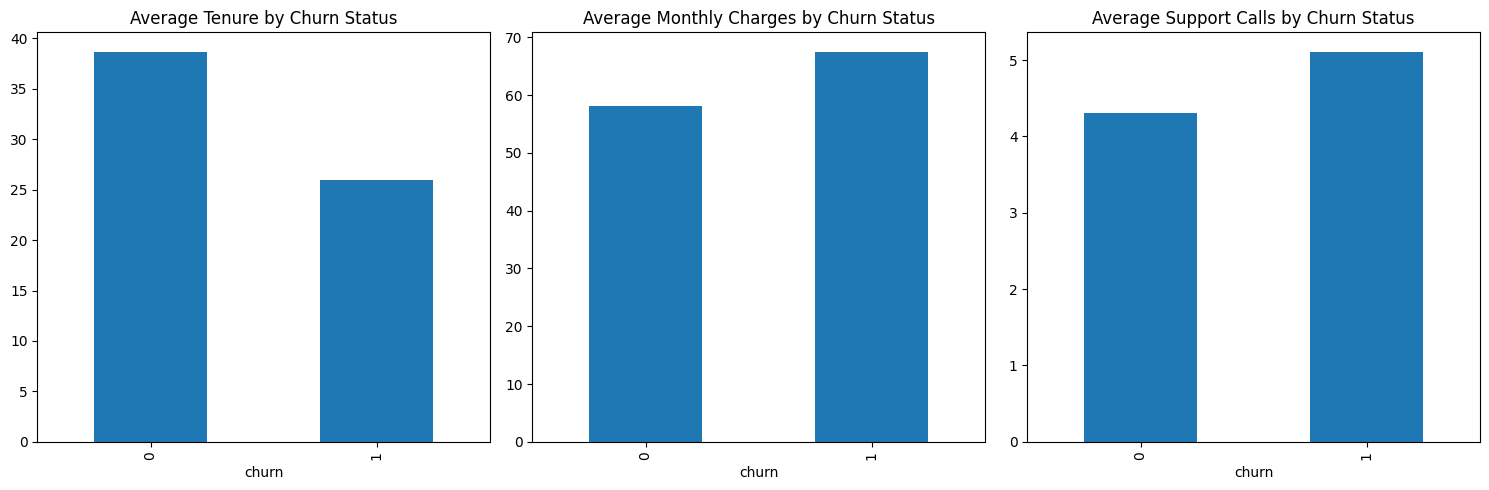

In [12]:
# Basic EDA

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df.groupby('churn')['tenure'].mean().plot(kind='bar')
plt.title('Average Tenure by Churn Status')

plt.subplot(1, 3, 2)
df.groupby('churn')['monthly_charges'].mean().plot(kind='bar')
plt.title('Average Monthly Charges by Churn Status')

plt.subplot(1, 3, 3)
df.groupby('churn')['support_calls'].mean().plot(kind='bar')
plt.title('Average Support Calls by Churn Status')

plt.tight_layout()
plt.show()